In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(stopwords.words('english'))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
!pip install chardet

# Import the chardet module
import chardet

# Detect the encoding of the CSV file
with open('/content/train.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

# Read the CSV file with the detected encoding
df = pd.read_csv('/content/train.csv', encoding=encoding)

# Verify that the data is loaded correctly
df.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
df.shape


(27481, 10)

In [ ]:
df



,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [ ]:
df.isnull().sum()
df.dropna(inplace=True)


In [ ]:
df.isnull().sum()


,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [ ]:
df['sentiment'].value_counts()


,count
sentiment,
neutral,11117
positive,8582
negative,7781


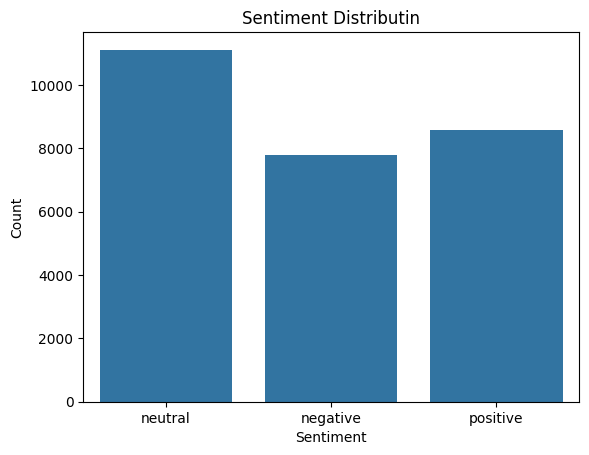

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the df DataFrame
df1 = df.copy()

# Convert Timestamp to datetime

# Plot 1: Sentiment Distribution
sns.countplot(x='sentiment', data=df1)
plt.title('Sentiment Distributin')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
port_stem=PorterStemmer()


In [ ]:

def stemming(content):
  stemmed_content= re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [ ]:
df['stemmed_content']=df['text'].apply(stemming)


In [ ]:
df.head()


,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),stemmed_content
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,sooo sad miss san diego
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,boss bulli
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,interview leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,son put releas alreadi bought


In [ ]:
print(df['stemmed_content'])


0                                               respond go
1                                  sooo sad miss san diego
2                                               boss bulli
3                                      interview leav alon
4                            son put releas alreadi bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    wonder rake client made clear net forc dev lea...
27478    yay good enjoy break probabl need hectic weeke...
27479                                                worth
27480                           flirt go atg smile yay hug
Name: stemmed_content, Length: 27480, dtype: object


In [ ]:
print(df['sentiment'])
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sentiment' column
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

# View the first few rows to verify the encoding
print(df[['sentiment', 'sentiment_encoded']].head())




0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object
  sentiment  sentiment_encoded
0   neutral                  1
1  negative                  0
2  negative                  0
3  negative                  0
4  negative                  0


In [ ]:
X=df['stemmed_content'].values
Y=df['sentiment_encoded'].values


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y,random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(27480,) (24732,) (2748,)


In [ ]:
#Convertinng the textual data to numerical data

vectorizer= TfidfVectorizer()

X_train= vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [ ]:
print(X_train)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 169620 stored elements and shape (24732, 18382)>
  Coords	Values
  (0, 2722)	0.7304681625262776
  (0, 7460)	0.40232549880078394
  (0, 1120)	0.35555460572383885
  (0, 6816)	0.4220561324027288
  (1, 11368)	0.4289212614494439
  (1, 7564)	0.41834870451110356
  (1, 8877)	0.2602968469606071
  (1, 12321)	0.3354177148865274
  (1, 9863)	0.3893793452032753
  (1, 4184)	0.4203033505055268
  (1, 9973)	0.363978350999153
  (2, 12812)	0.45610614335151217
  (2, 11216)	0.3709487815582795
  (2, 7035)	0.5179325615836198
  (2, 17321)	0.4086900834468125
  (2, 15674)	0.46806245822657605
  (3, 7460)	0.3716018515928185
  (3, 10284)	0.3834039015601196
  (3, 17807)	0.25571754230473837
  (3, 8975)	0.47032671054692676
  (3, 15007)	0.304398285895276
  (3, 9165)	0.35788058058941336
  (3, 14460)	0.45560729762153823
  (4, 9792)	0.16982562349832417
  (4, 14884)	0.20659848266705835
  :	:
  (24728, 6298)	0.23346337975896397
  (24728, 17199)	0.3353472150006471


In [ ]:
print(X_test)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 17709 stored elements and shape (2748, 18382)>
  Coords	Values
  (0, 251)	0.4588282918314967
  (0, 3271)	0.5067654087615293
  (0, 4021)	0.4601863981184019
  (0, 9428)	0.43277708145187277
  (0, 12812)	0.3655104592957112
  (1, 617)	0.4849464360872533
  (1, 2331)	0.7509827318000903
  (1, 6702)	0.33215571284333395
  (1, 15843)	0.3008728520320198
  (2, 6343)	0.3503425613153478
  (2, 12433)	0.5290646860386339
  (2, 13708)	0.5430158029466345
  (2, 18138)	0.5499858956992126
  (3, 5063)	0.24328884161912964
  (3, 5071)	0.2669945628927945
  (3, 5842)	0.26634061175165724
  (3, 6152)	0.17114209555007237
  (3, 6802)	0.35892101650527036
  (3, 7129)	0.32153591971018497
  (3, 7228)	0.37171728557036576
  (3, 8877)	0.22433225969242665
  (3, 13755)	0.4986479400480273
  (3, 13849)	0.20549257525285036
  (3, 17321)	0.24023361777661062
  (4, 2532)	0.5379121403240849
  :	:
  (2742, 3141)	0.47961734873000306
  (2742, 14624)	0.5534910495941676
  (2743

In [ ]:
model=LogisticRegression(C=1.0,                      # Regularization strength (default)
  class_weight= None,          # No class balancing
  dual= False,
  fit_intercept= True,
  intercept_scaling= 1,
  l1_ratio=None,
  max_iter= 1000,              # Model trained with 1000 iterations
  multi_class= 'auto',
  n_jobs= None,
  penalty= 'l2',               # L2 regularization
  random_state=None,
  solver= 'lbfgs',             # Default for L2 problems
  tol= 0.0001,
  verbose= 0,
  warm_start= False)


In [ ]:
model.fit(X_train,Y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='auto')

In [ ]:
#accuracy score on the training data
X_train_prediction= model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)


In [ ]:
print('Accuracy score on the training data:', training_data_accuracy)


Accuracy score on the training data: 0.8039382176936762


In [ ]:
#accuracy score on the test data
X_test_prediction= model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)



In [ ]:
print('Accuracy score on the test data:', test_data_accuracy)


Accuracy score on the test data: 0.7063318777292577


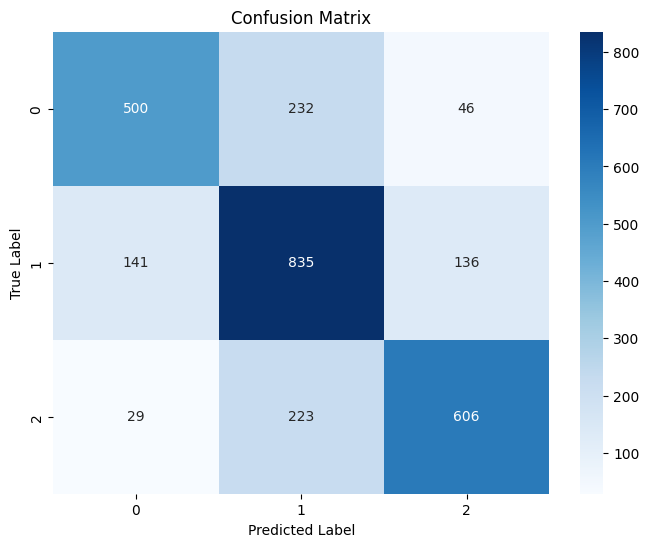

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:

from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_test, X_test_prediction)

# Print classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.64      0.69       778
           1       0.65      0.75      0.70      1112
           2       0.77      0.71      0.74       858

    accuracy                           0.71      2748
   macro avg       0.72      0.70      0.71      2748
weighted avg       0.71      0.71      0.71      2748



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


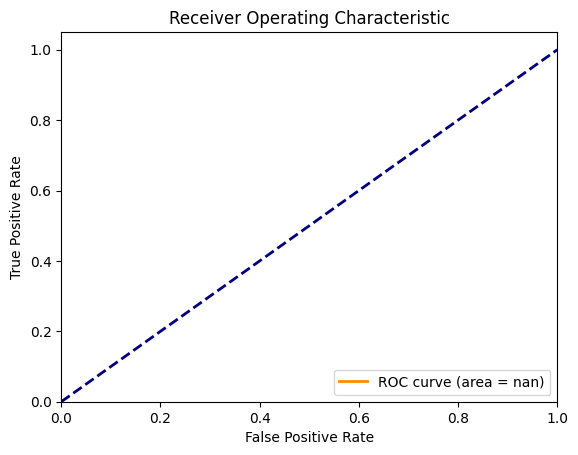

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the target variable
Y_test_binarized = label_binarize(Y_test, classes=['0', '1'])

# Convert X_test_prediction to float
X_test_prediction = X_test_prediction.astype(float)

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test_binarized[:, 1], X_test_prediction)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle


In [ ]:
filename= 'trained_model.sav'
pickle.dump(model,open(filename, 'wb'))



In [ ]:
loaded_model= pickle.load(open('/content/trained_model.sav', 'rb'))


In [ ]:
# Assuming 'model' and 'vectorizer' are already loaded into memory

# Define mapping: model output -> (custom label: meaning)
label_mapping = {
    2: "Positive",
    0: "Negative",
    1: "Neutral"
}

while True:
    user_text = input("Enter your text (or type 'exit' to quit): ").strip()

    if user_text.lower() == 'exit':
        print("Exiting sentiment analyzer.")
        break

    if user_text:
        text_vector = vectorizer.transform([user_text])
        prediction = model.predict(text_vector)[0]
        sentiment_label = label_mapping.get(prediction, "Unknown")
        print(f"Predicted Sentiment: {sentiment_label}\n")
    else:
        print("Please enter some text.\n")


Enter your text (or type 'exit' to quit): terrorist killed people
Predicted Sentiment: Neutral

Enter your text (or type 'exit' to quit): he beated her
Predicted Sentiment: Neutral

Enter your text (or type 'exit' to quit): he killed her
Predicted Sentiment: Neutral

Enter your text (or type 'exit' to quit): kill you
Predicted Sentiment: Negative



KeyboardInterrupt: Interrupted by user